Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os



Testing the dataset

In [2]:
database_dir = "/Users/alexrendell/Documents/MSc - Advanced Computer Science/CSCM10-Computer_Science_Project_Research_Methods/Databases/BreakHis_BreastCancer"

num_files = sum(len(files) for _, _, files in os.walk(database_dir))

print(f"Total number of files: {num_files}")



Total number of files: 7909


Spliting the data
70%: Training
15%: Testing
15%: Validation

In [3]:

from Data_Preprocessing import BreastCancerDataset, transform

dataset = BreastCancerDataset(root_dir=database_dir, transform=transform)

from torch.utils.data import random_split, DataLoader

#Changing the size of the slplit
train_size = int(0.05 * len(dataset))  # 80% for training
val_size = int(0.015 * len(dataset))  # 15% for validation
test_size = int(0.014 * len(dataset))  # 15% for testing
spare_size = len(dataset) - train_size - val_size - test_size

#using random_split to divide the dataset
train_dataset, val_dataset, test_dataset, spare_size = random_split(dataset, [train_size, val_size, test_size, spare_size])

# Create data loaders for training and validation datasets
# The dataLoader stores the images and their labels
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

 #train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True)

#print(len(train_loader))
#print(len(val_loader))


print(train_size)
print(val_size)
print(test_size) 

#print(len(dataset.labels))

Image Paths: ['/Users/alexrendell/Documents/MSc - Advanced Computer Science/CSCM10-Computer_Science_Project_Research_Methods/Databases/BreakHis_BreastCancer/SOB_M_DC-14-13993-400-017.png', '/Users/alexrendell/Documents/MSc - Advanced Computer Science/CSCM10-Computer_Science_Project_Research_Methods/Databases/BreakHis_BreastCancer/SOB_M_DC-14-9461-200-017.png', '/Users/alexrendell/Documents/MSc - Advanced Computer Science/CSCM10-Computer_Science_Project_Research_Methods/Databases/BreakHis_BreastCancer/SOB_M_MC-14-19979-400-005.png', '/Users/alexrendell/Documents/MSc - Advanced Computer Science/CSCM10-Computer_Science_Project_Research_Methods/Databases/BreakHis_BreastCancer/SOB_B_F-14-23060CD-100-001.png', '/Users/alexrendell/Documents/MSc - Advanced Computer Science/CSCM10-Computer_Science_Project_Research_Methods/Databases/BreakHis_BreastCancer/SOB_M_DC-14-4372-400-004.png', '/Users/alexrendell/Documents/MSc - Advanced Computer Science/CSCM10-Computer_Science_Project_Research_Methods/D

printing the model architecture

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from ResNetModel import create_Resnet_Model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = create_Resnet_Model(num_classes=2, device=device)

print(model)

Actually training the model with our dat

In [ ]:
import ResNetModel
import importlib

importlib.reload(ResNetModel)

from ResNetModel import train_model

num_epochs = 8
batch_size = 16
learning_rate = 0.01

trained_model = train_model(model, train_loader, val_loader, num_epochs=num_epochs,
                            batch_size=batch_size, learning_rate=learning_rate, device=device)

torch.save(trained_model.state_dict(), "breast_cancer_model.pth")

load model
generate adversarial test images
evaluate the model on the newly perturbed images

Accuracy on normal test images: 93.64%
Accuracy on adversarial images (FGSM, ε=1): 31.82%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


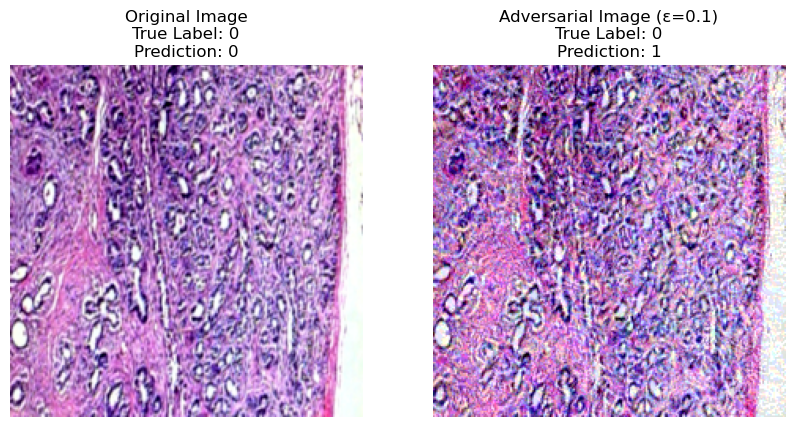

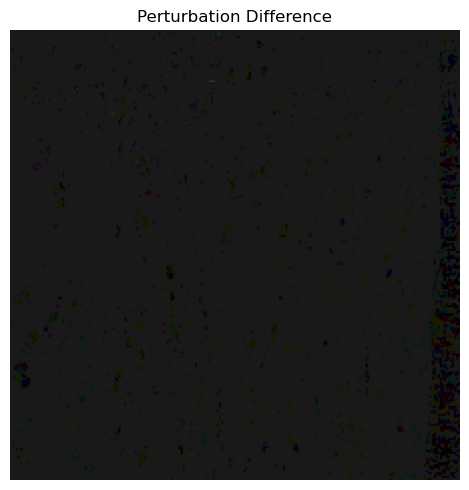

In [13]:
import FGSM 
import importlib

importlib.reload(FGSM)

from FGSM import FGSM
from FGSM import plot_adversarial_vs_original

# Initialize the model again
model = create_Resnet_Model(num_classes=2, device=device)

# Load the model's state dictionary
model.load_state_dict(torch.load("breast_cancer_model.pth"))

# make sure to move the model to the correct device
model = model.to(device=device)

fgsm = FGSM(model, epsilon=1, device =device)

fgsm.generate_adversarial_images(test_loader)

img_num = 3 # The image number must be <= batch_size

plot_adversarial_vs_original(model, test_loader, img_num, epsilon=0.1, device=device)

Plotting an original image next to a permutated image 